#  TAREA 1

Aprendizaje de Máquina

Profesor: felpalta@uao.edu.co

--------------------------------------------------------------------------------
*   Nombre :Miguel Angel Jimenez Trochez
*   Correo :miguel.jimenez@uao.edu.co




Lectura del codigo

Librerias


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [4]:
import pandas as pd

url = "https://raw.githubusercontent.com/MiguelAngeloTr/Aprendizaje_Automatico/refs/heads/main/Primera_entrega/diabetes_.csv"
diabetes = pd.read_csv(url)
diabetes.head()



,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
# Ver dimensiones

print("Dimensiones\n")
print("Filas, columnas:", diabetes.shape)

# Ver columnas y tipos de datos
print(diabetes.dtypes)

Dimensiones

Filas, columnas: (768, 9)
Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object


Limpieza de datos

In [6]:
diabetes.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


El dataset tiene minimos de 0 en las variables de glocose, BloodPressure, SkinThickness, Insulin, BMI, por lo tanto esos valores deben tratarse como nulos

In [9]:
import numpy as np

cols_with_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
diabetes[cols_with_zero] = diabetes[cols_with_zero].replace(0, np.nan)


# **1. ¿Cuántas clases hay presentes en el dataset?**

In [10]:
diabetes["Outcome"].value_counts().to_frame()

,count
Outcome,
0,500
1,268


Resultado : Tiene dos clases, 1 para positivo en diabetes y 2 para negativo en diabetes

# **2. Cuantas características hay presentes en el dataset y dar explicación de cada una de estas.**

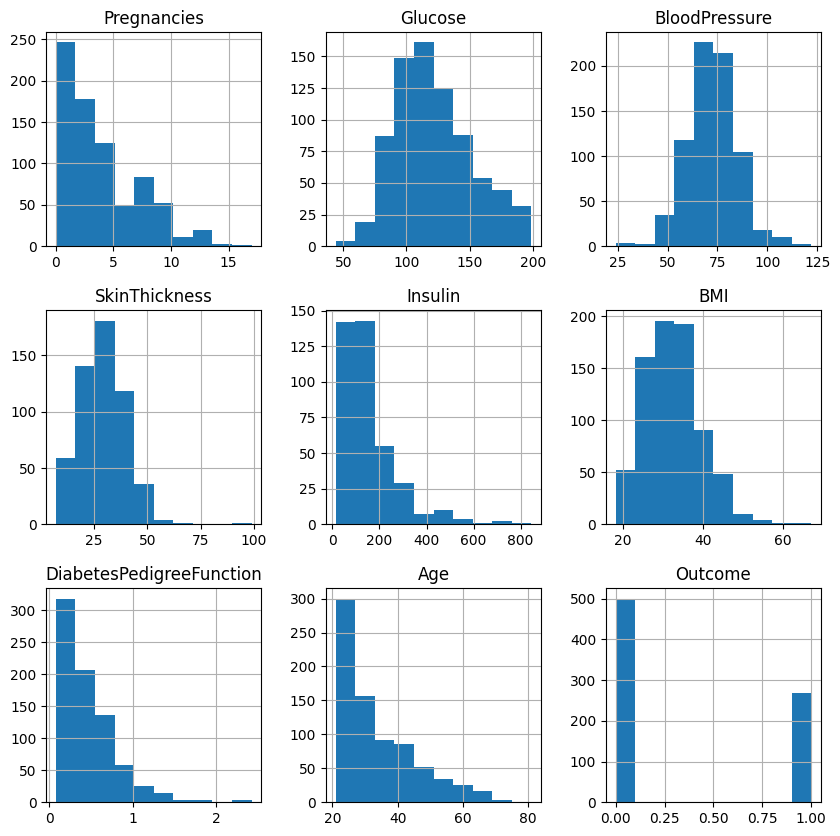

In [11]:
diabetes.hist(figsize=(10,10),bins=10)
plt.show()

Respuesta : Tenemos 8 caracteristicas  

1. Número de embarazos (Pregnancies)
Representa la cantidad de veces que la paciente ha estado embarazada. Es un dato de tipo entero. Esta variable es relevante porque los cambios hormonales y metabólicos durante los embarazos pueden aumentar el riesgo de desarrollar diabetes tipo 2 o diabetes gestacional.

2. Glucosa en sangre en ayunas (Glucose)
Corresponde a la concentración de glucosa plasmática medida en miligramos por decilitro (mg/dL) después de una prueba de tolerancia a la glucosa. Es un dato numérico continuo. Su importancia radica en que niveles elevados de glucosa son un indicador directo del riesgo o presencia de diabetes.
3. Presión arterial diastólica (BloodPressure)
Indica la presión arterial diastólica, es decir, la presión mínima en las arterias entre latidos del corazón, medida en milímetros de mercurio (mmHg). Es un dato numérico continuo. La presión arterial elevada está estrechamente relacionada con complicaciones cardiovasculares y metabólicas asociadas a la diabetes.
4. Espesor del pliegue cutáneo del tríceps (SkinThickness)
Mide en milímetros el grosor del pliegue cutáneo del tríceps, utilizado como estimación indirecta del nivel de grasa corporal subcutánea. Es un dato numérico continuo. Su importancia radica en que un mayor espesor de grasa corporal se asocia con resistencia a la insulina y mayor riesgo de diabetes.
5. Insulina sérica en sangre (Insulin)
Representa la concentración de insulina sérica medida dos horas después de una prueba de tolerancia a la glucosa, expresada en micro unidades por mililitro (μU/mL). Es un dato numérico continuo. Esta variable es importante para evaluar la función pancreática y la presencia de resistencia a la insulina.

6. Índice de masa corporal (BMI)
Se calcula como el peso en kilogramos dividido por el cuadrado de la altura en metros (kg/m²). Es un dato numérico continuo. Es fundamental porque el sobrepeso y la obesidad constituyen factores de riesgo clave para el desarrollo de diabetes tipo 2.

7. Función hereditaria de la diabetes (DiabetesPedigreeFunction)
Es un valor adimensional que estima la probabilidad de desarrollar diabetes en función de los antecedentes familiares. Es un dato numérico continuo. Su importancia radica en que refleja la influencia genética y familiar sobre la predisposición a la enfermedad.

8. Edad (Age)
Corresponde a la edad del individuo en años. Es un dato de tipo entero. La edad avanzada se asocia con un incremento del riesgo de desarrollar diabetes tipo 2, debido a la disminución progresiva de la sensibilidad a la insulina y otros factores metabólicos.

# **3. ¿El dataset esta balanceado?**



Resultado: El dataset no esta balanceado ya que la cantidad de muestras para positivo (personas con diabetes(268)) es menor con respecto a la cantidad de muestras negativas (personas sin diabetes(500))


4. Hay datos nulos presentes en el dataset. ¿Que implicación tiene tener valores nulos en el dataset?



In [12]:


print("\nValores nulos\n")

# Ver si hay valores nulos
print(diabetes.isnull().sum())




Valores nulos

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


Respuesta : Despues de realizar la limpieza se puede observar que en efecto hay valores nulos presentes Las variables SkinThickness e Insulin presentan una pérdida de datos muy alta (30%–50%), lo que puede distorsionar los resultados del modelo si se imputan de manera ingenua.

**4.1. Investigue y aplique alguna técnica de imputación de datos, en caso de que se encuentre una presencia significativa de nulos, justifique claramente su respuesta y actuar a nivel de código.**







In [14]:
from sklearn.impute import SimpleImputer

# Crear copia para trabajar
diabetes_clean = diabetes.copy()

# Columnas con pocos nulos → usar mediana global
low_null = ['Glucose', 'BloodPressure', 'BMI']

# Columnas con muchos nulos → imputar mediana por clase (Outcome)
high_null = ['Insulin', 'SkinThickness']

# 1️⃣ Imputar con mediana global
imputer_med = SimpleImputer(strategy='median')
diabetes_clean[low_null] = imputer_med.fit_transform(diabetes_clean[low_null])

# 2️⃣ Imputar con mediana por clase
diabetes_clean[high_null] = diabetes_clean.groupby('Outcome')[high_null].transform(lambda x: x.fillna(x.median()))

# Verificar nuevamente los nulos
print("Valores nulos después de la imputación:\n")
print(diabetes_clean.isnull().sum())


Valores nulos después de la imputación:

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64


# **5. Hacer un pairplot de las características y concluir visualmente si ve algún patrón interesante, que le pueda servir con el objetivo de realizar una posible clasificación.**

In [ ]:
sns.pairplot(diabetes_clean, hue="Outcome", markers=["o","s"], palette="Set2")

# **6. Hacer un gráfico del histograma de cada una de las características para cada una de las clases. Concluir sobre cada uno de los histogramas para cada clase.**



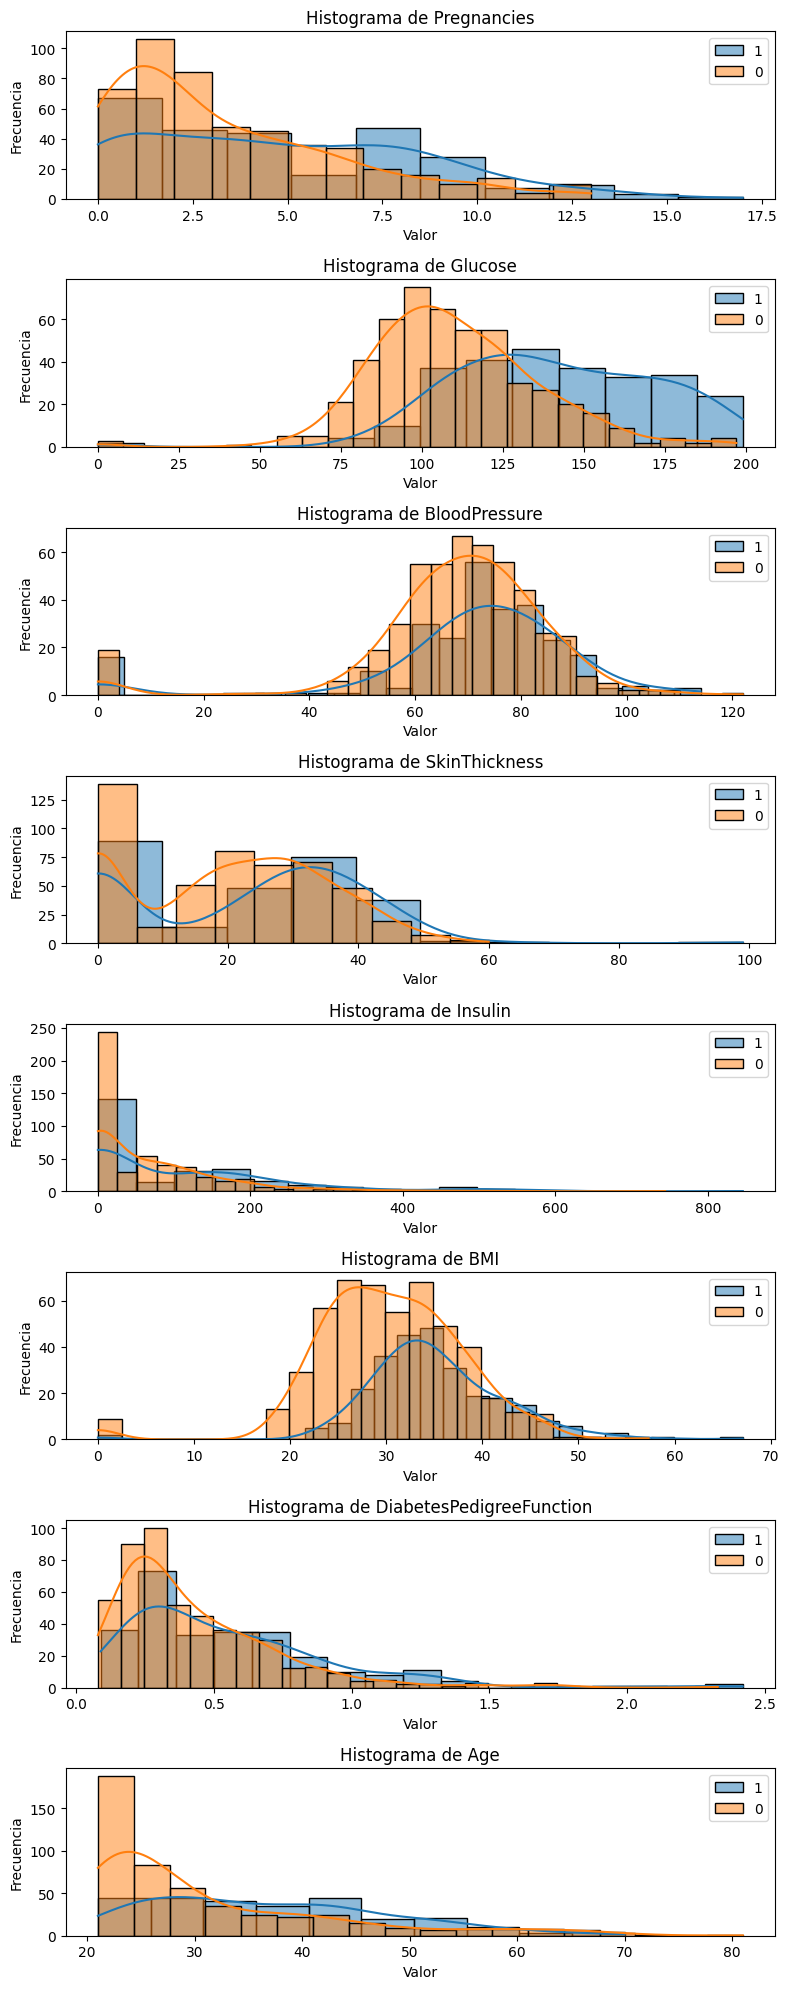

In [22]:
# Crear las figuras y los subplots
fig, axes = plt.subplots(8, 1, figsize=(8, 20))

# Lista de características y clases
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
classes = diabetes['Outcome'].unique()

# Iterar sobre las características y crear histogramas para cada clase
for i, feature in enumerate(features):
    for cls in classes:
        sns.histplot(diabetes[diabetes['Outcome'] == cls][feature], ax=axes[i], label=cls, kde=True)
    axes[i].set_title(f'Histograma de {feature}')
    axes[i].set_xlabel('Valor')
    axes[i].set_ylabel('Frecuencia')
    axes[i].legend()

# Ajustar el espaciado entre subplots
plt.tight_layout()

# Mostrar las figuras
plt.show()

Resultado:
Conclusiones:


**6.1 Test de Gaussianidad**

In [24]:
from scipy.stats import shapiro

for col in diabetes.columns[:-1]:
    stat, p = shapiro(diabetes[col])
    print(f"{col}: p={p:.4f}")


Pregnancies: p=0.0000
Glucose: p=0.0000
BloodPressure: p=0.0000
SkinThickness: p=0.0000
Insulin: p=0.0000
BMI: p=0.0000
DiabetesPedigreeFunction: p=0.0000
Age: p=0.0000


# **7. Graficar y explicar un mapa de calor de la correlación de las clases, en el cual se incluya la variable objetivo y concluir al respecto.**

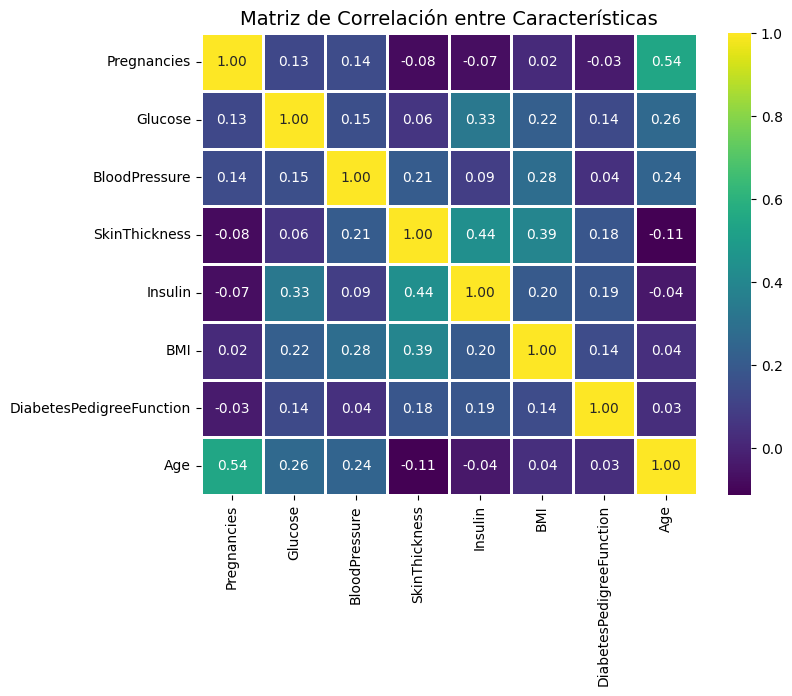

In [25]:
# Seleccionar solo las columnas numéricas para la matriz de correlación
numeric_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction','Age']
numeric_data = diabetes[numeric_cols]

# Calcular la matriz de correlación
correlation_matrix = numeric_data.corr()

# Crear una figura y un eje (subplot) utilizando seaborn
plt.figure(figsize=(8, 6))

# Cambiar el colormap a 'viridis' (otro colormap fresco)
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f', linewidths=1, linecolor='white')

# Añadir título
plt.title('Matriz de Correlación entre Características', fontsize=14)

# Mostrar la matriz de correlación
plt.show()

# **8. Si usted tuviese que elegir en orden de importancia las tres mejores características para efecto de una posible clasificación ¿Cuáles tomaría?**